In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# package: keras
# backend: theano or tensor-flow

In [2]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, LSTM, Activation, MaxPooling2D, Dropout
from keras.callbacks import Callback
from keras.utils import np_utils

Using Theano backend.


In [3]:
model = Sequential([
    Dense(1, input_dim=1000, activation='sigmoid')
])

In [4]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [6]:
# ! pip install pydot==1.1.0

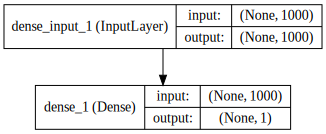

In [5]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [8]:
# from keras.utils.visualize_util import plot
# plot(model, to_file='model.png')

## Basic components

In [ ]:
# High level: model (or sequence)

In [ ]:
# Layers
# 1. Dense
# 2. Conv
# 3. Recurrent
# 4. Pooling
# 5. Dropout 

In [ ]:
# input -> layer 1 -> layer 2 -> layer 3 -> ... -> layer N -> output
# layer # normally remove the input layer
# previous example is 1 layer, input directly get output
# adding one more layer is 2 layer
# one more is 3 layer
# if not photo ... usually 2 ~ 3 is good enough

In [ ]:
# Components:
# 0. objectives (loss function)
# 1. activation
# 2. optimizer
# 3. regularizer
# 4. callback

In [ ]:
# Objectives (loss function)
# classification
# binary_crossentropy (logistic regression)
# categorical_crossentropy (multi class logistic regression)
# sparse_categorical_crossentropy
# hinge (SVM)

# regression
# mse (mean squared error)
# mae (mean absolute error)

In [ ]:
# Activation functions
# after the linear combination, how to transform the result?
# F(w*X)    F is the activation function

In [ ]:
# softmax (normalized exponential)
# https://en.wikipedia.org/wiki/Softmax_function
# softplus ln(1+exp(x))
# https://en.wikipedia.org/wiki/Rectifier_(neural_networks)
# softsign:  x/(1+|x|)
# relu
# tanh
# sigmoid: 1 / (1 + exp(-x))
# hard_sigmoid (piecewise interporlation of sigmoid)
# linear: 

In [8]:
import numpy as np
x = np.arange(-5, 5, 0.1)
y_softplus = np.log(1+np.exp(x))
y_sofgsign = x / (1. + abs(x))
y_sigmoid = 1. / (1. + np.exp(-x))
y_relu = np.array([(0.0 if x1 < 0 else x1) for x1 in x])
y_leaky_relu = np.array([(0.1 * x1 if x1 < 0 else x1) for x1 in x])

y_hard_sigmoid = np.array([max(0.0, min(1.0, 0.2 * x1 + 0.5)) for x1 in x])
y_linear = x 

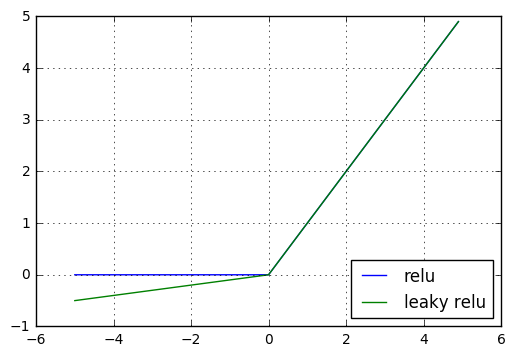

In [9]:
#plt.plot(x, y_softplus, label='softplus')
#plt.plot(x, y_sofgsign, label='softsign')
#plt.plot(x, y_sigmoid, label='sigmoid')
#plt.plot(x, y_hard_sigmoid, label='hard-sigmoid')
plt.plot(x, y_relu, label='relu')
plt.plot(x, y_leaky_relu, label='leaky relu')
#plt.plot(x, y_linear, label='linear')

plt.legend(loc='lower right')
plt.grid()
plt.show()

In [12]:
# optimizers
# SGD
import keras
keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

# Adagrad
keras.optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
# It adapts the learning rate to the parameters, 
# performing larger updates for infrequent and smaller updates for frequent parameters
# well-suited for dealing with sparse data
# main benefits is that it eliminates the need to manually tune the learning rate. 
# Most implementations use a default value of 0.01 and leave it at that.

keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
# improvement over Adagrad

# RMSProp (recurrent neural networks)
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08, schedule_decay=0.004)

In [ ]:
# http://sebastianruder.com/optimizing-gradient-descent/index.html 

In [ ]:
# Regularizer
# The penalties are applied on a per-layer basis.
# l1
# l2
# l1 + l2

In [ ]:
# Callback
# Calculate something during the training stage ...
# a few commonly used ones
# implement early stopping
# add check point (output temporary parameters)

## Fully connected network (Dense layer only)

In [ ]:
# demostration

In [16]:
from sklearn import datasets

In [17]:
X, Y = datasets.make_blobs(10000, n_features=100, centers=2, random_state=1)

In [18]:
X.shape, Y.shape

((10000, 100), (10000,))

In [19]:
from keras.layers import Dense, Activation
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(Dense(1, input_dim=100))
model.add(Activation('sigmoid'))

In [21]:
model.compile(optimizer='sgd', loss='binary_crossentropy')

In [22]:
model.fit(X, Y)

Epoch 1/10
10000/10000 [==============================] - 0s - loss: 0.1283     
Epoch 2/10
10000/10000 [==============================] - 0s - loss: 9.3537e-05     
Epoch 3/10
10000/10000 [==============================] - 0s - loss: 5.8952e-05     
Epoch 4/10
10000/10000 [==============================] - 0s - loss: 4.3412e-05     
Epoch 5/10
10000/10000 [==============================] - 0s - loss: 3.4437e-05     
Epoch 6/10
10000/10000 [==============================] - 0s - loss: 2.8567e-05     
Epoch 7/10
10000/10000 [==============================] - 0s - loss: 2.4424e-05     
Epoch 8/10
10000/10000 [==============================] - 0s - loss: 2.1335e-05     
Epoch 9/10
10000/10000 [==============================] - 0s - loss: 1.8945e-05     
Epoch 10/10
10000/10000 [==============================] - 0s - loss: 1.7037e-05     


In [23]:
(model.predict(X).round(1).ravel() == Y).sum()

10000

## Tune MLP

In [24]:
# create sample 2D data sets, for clustering
X, Y = datasets.make_blobs(n_samples=1000, n_features=2, centers=2, random_state=1)

In [25]:
from sklearn import preprocessing
pp_ss = preprocessing.StandardScaler()
X_new = pp_ss.fit_transform(X)

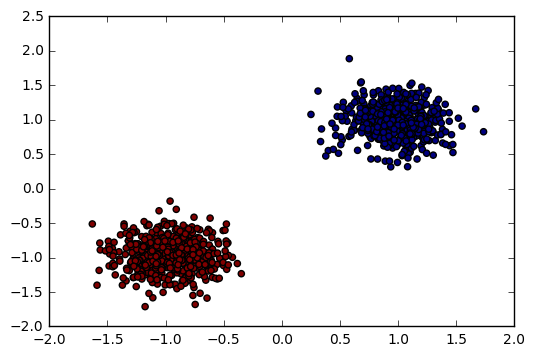

In [26]:
# visualize cluster
plt.scatter(X_new[:,0], X_new[:,1], c=Y)

In [27]:
def visualize_result(X, Y, model):
    '''
    Visualize the decision boundary for this model, based on given X and Y input
    
    '''
    x_min, y_min = X.min(axis=0)
    x_max, y_max = X.max(axis=0)
    # generate 100 * 100 grid, by default
    N = 100
    gridx = np.arange(x_min, x_max + (x_max - x_min) / N, (x_max - x_min) / N)
    gridy = np.arange(y_min, y_max + (x_max - x_min) / N, (y_max - y_min) / N)

    xx, yy = np.meshgrid(gridx, gridy)

    test_data = []
    for item in zip(xx.ravel(), yy.ravel()):
        test_data.append(item)
    test_data = np.array(test_data)
    test_pred = model.predict_proba(test_data)
    test_pred = test_pred.reshape(xx.shape)

    plt.contourf(xx, yy, test_pred, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=Y)

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(1, input_dim=2, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
1000/1000 [==============================] - 0s - loss: 0.0381 - acc: 1.0000     
Epoch 2/10
1000/1000 [==============================] - 0s - loss: 0.0375 - acc: 1.0000     
Epoch 3/10
1000/1000 [==============================] - 0s - loss: 0.0368 - acc: 1.0000     
Epoch 4/10
1000/1000 [==============================] - 0s - loss: 0.0362 - acc: 1.0000     
Epoch 5/10
1000/1000 [==============================] - 0s - loss: 0.0356 - acc: 1.0000     
Epoch 6/10
1000/1000 [==============================] - 0s - loss: 0.0350 - acc: 1.0000     
Epoch 7/10
1000/1000 [==============================] - 0s - loss: 0.0344 - acc: 1.0000     
Epoch 8/10
1000/1000 [==============================] - 0s - loss: 0.0339 - acc: 1.0000     
Epoch 9/10
1000/1000 [==============================] - 0s - loss: 0.0333 - acc: 1.0000     
Epoch 10/10
 8576/10201 [========================>.....] - ETA: 0s

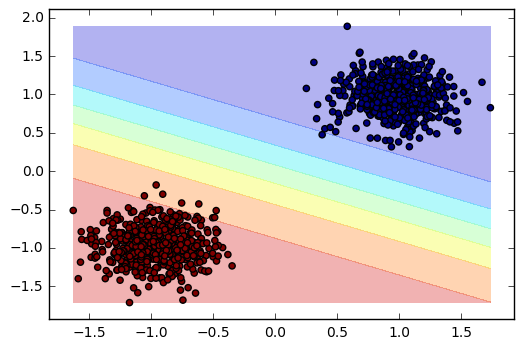

In [39]:
# play with the model, trying to understand how the model get adjusted in terms of
# decision boundary, prediction confidence
# is this overfitting ???
model.fit(X_new,Y, nb_epoch=10)
visualize_result(X_new, Y, model)

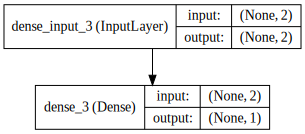

In [31]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [40]:
model.layers[0].get_weights()[1]

array([ 0.0021688], dtype=float32)

## Nonlinear cases

In [41]:
# function to create artificial 2D clustering

parameters = np.array([
    [1, 1, 0],
    [1, -1, 1],
    [-1, -1, 0],
    [-1, 1, 1]
])
N = 100
std = 0.3

In [42]:
def generate_cluster(parameters, N, std):
    data_x = []
    data_y = []
    data_c = []
    np.random.seed(1)
    for row in parameters:
        data_x.extend( np.random.randn(N) * std + row[0] )
        data_y.extend( np.random.randn(N) * std + row[1] )
        data_c.extend( [row[2] for i in range(N)] )
    X = [data_x, data_y]
    X = np.array(X).T
    Y = np.array(data_c)
    return X, Y

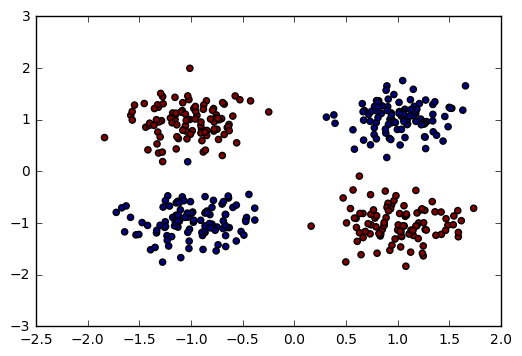

In [43]:
X, Y = generate_cluster(parameters, N, std)
plt.scatter(X[:,0], X[:,1], c=Y)

In [44]:
model = Sequential([
    Dense(2, input_dim=2, activation='sigmoid'),
    #Dense(2, input_dim=4, activation='sigmoid'),
    Dense(1, input_dim=2, activation='sigmoid'),
])

from keras.optimizers import SGD
sgd = SGD(lr=0.05, decay=1e-6, momentum=0.8, nesterov=True)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/100
400/400 [==============================] - 0s - loss: 0.7550 - acc: 0.5025     
Epoch 2/100
400/400 [==============================] - 0s - loss: 0.6998 - acc: 0.6100     
Epoch 3/100
400/400 [==============================] - 0s - loss: 0.6973 - acc: 0.5000     
Epoch 4/100
400/400 [==============================] - 0s - loss: 0.6956 - acc: 0.5000     
Epoch 5/100
400/400 [==============================] - 0s - loss: 0.6959 - acc: 0.5025     
Epoch 6/100
400/400 [==============================] - 0s - loss: 0.6956 - acc: 0.5025     
Epoch 7/100
400/400 [==============================] - 0s - loss: 0.6952 - acc: 0.5025     
Epoch 8/100
400/400 [==============================] - 0s - loss: 0.6944 - acc: 0.5125     
Epoch 9/100
400/400 [==============================] - 0s - loss: 0.6941 - acc: 0.5100     
Epoch 10/100
400/400 [==============================] - 0s - loss: 0.6941 - acc: 0.5075     
Epoch 11/100
400/400 [==============================] - 0s - loss: 0.6941 - acc

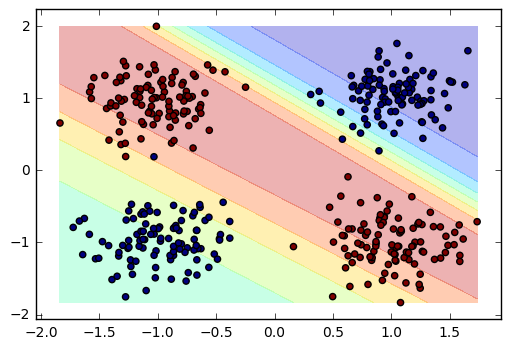

In [45]:
np.random.seed(1)
model.fit(X, Y, nb_epoch=100)
visualize_result(X, Y, model)

In [46]:
parameters = np.array([
    [2, 0, 0],
    [0, 0, 1],
    [-2, 0, 0]
])
# play with the data expand the non-linear cases, see how the model could fit this
N = 100
std = 0.2

X, Y = generate_cluster(parameters, N, std)

In [47]:
model = Sequential([
    # Dense(2, input_dim=2, activation='sigmoid'),
    Dense(2, input_dim=2, activation='sigmoid'),
    Dense(1, input_dim=2, activation='sigmoid'),
])

from keras.optimizers import SGD
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.8, nesterov=True)

model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

Epoch 1/100
300/300 [==============================] - 0s - loss: 0.6432 - acc: 0.6667     
Epoch 2/100
300/300 [==============================] - 0s - loss: 0.6404 - acc: 0.6667     
Epoch 3/100
300/300 [==============================] - 0s - loss: 0.6381 - acc: 0.6667     
Epoch 4/100
300/300 [==============================] - 0s - loss: 0.6365 - acc: 0.6667     
Epoch 5/100
300/300 [==============================] - 0s - loss: 0.6345 - acc: 0.6667     
Epoch 6/100
300/300 [==============================] - 0s - loss: 0.6329 - acc: 0.6667     
Epoch 7/100
300/300 [==============================] - 0s - loss: 0.6310 - acc: 0.6667     
Epoch 8/100
300/300 [==============================] - 0s - loss: 0.6293 - acc: 0.6667     
Epoch 9/100
300/300 [==============================] - 0s - loss: 0.6268 - acc: 0.6667     
Epoch 10/100
300/300 [==============================] - 0s - loss: 0.6221 - acc: 0.6667     
Epoch 11/100
300/300 [==============================] - 0s - loss: 0.6177 - acc

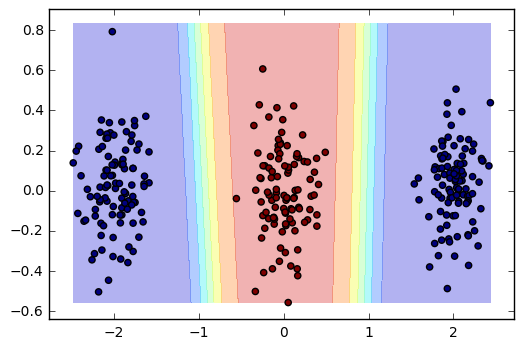

In [48]:
np.random.seed(1)
model.fit(X, Y, nb_epoch=100)
visualize_result(X, Y, model)

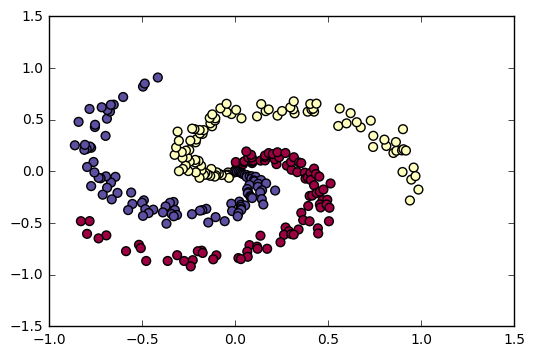

In [49]:
# More complicated example

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in xrange(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

In [50]:
model = Sequential([
        Dense(3, input_dim=2, activation='softmax')
    ])

In [51]:
Y = np_utils.to_categorical(y, 3)
print Y.shape

(300, 3)


In [52]:
model.compile(optimizer='Adagrad', loss='categorical_crossentropy')

In [53]:
model.fit(X, Y)

Epoch 1/10
300/300 [==============================] - 0s - loss: 1.1712     
Epoch 2/10
300/300 [==============================] - 0s - loss: 1.1573     
Epoch 3/10
300/300 [==============================] - 0s - loss: 1.1489     
Epoch 4/10
300/300 [==============================] - 0s - loss: 1.1418     
Epoch 5/10
300/300 [==============================] - 0s - loss: 1.1364     
Epoch 6/10
300/300 [==============================] - 0s - loss: 1.1315     
Epoch 7/10
300/300 [==============================] - 0s - loss: 1.1270     
Epoch 8/10
300/300 [==============================] - 0s - loss: 1.1229     
Epoch 9/10
300/300 [==============================] - 0s - loss: 1.1191     
Epoch 10/10
300/300 [==============================] - 0s - loss: 1.1154     


## Conv net, image processing

In [ ]:
# abstraction demonstration

In [ ]:
# MNIST dataset example
# performance comparison vs. traditional ML technique

In [61]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [62]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

In [63]:
from sklearn import ensemble, metrics

In [64]:
rfc = ensemble.RandomForestClassifier(n_estimators=101)

In [65]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=101, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [66]:
metrics.confusion_matrix(y_test, rfc.predict(X_test))

array([[ 969,    0,    1,    1,    0,    2,    4,    1,    2,    0],
       [   0, 1125,    2,    3,    1,    1,    2,    0,    1,    0],
       [   6,    0, 1003,    6,    1,    0,    2,    8,    6,    0],
       [   0,    0,   12,  977,    0,    4,    0,    8,    8,    1],
       [   1,    0,    2,    0,  958,    0,    4,    0,    2,   15],
       [   3,    0,    0,   10,    3,  861,    6,    2,    4,    3],
       [   5,    3,    1,    0,    3,    4,  939,    0,    3,    0],
       [   1,    2,   18,    0,    2,    0,    0,  991,    3,   11],
       [   5,    0,    6,    8,    3,    6,    7,    4,  924,   11],
       [   6,    5,    2,    9,   11,    5,    1,    4,    6,  960]])

In [67]:
metrics.accuracy_score(y_test, rfc.predict(X_test))

0.97070000000000001

In [74]:
batch_size = 128
nb_classes = 10
nb_epoch = 12

from keras.utils import np_utils
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [76]:
model = Sequential()
model.add(Dense(128, input_dim=28*28))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
# model.add(Dropout(0.5))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, nb_epoch=5)

Y_test_pred = model.predict(X_test)
1. * sum(Y_test_pred.argmax(axis=1) == Y_test.argmax(axis=1)) / Y_test_pred.shape[0]

Epoch 1/5
60000/60000 [==============================] - 3s - loss: 5.5111 - acc: 0.6352     
Epoch 2/5
60000/60000 [==============================] - 4s - loss: 2.7017 - acc: 0.8175     
Epoch 3/5
60000/60000 [==============================] - 5s - loss: 2.4330 - acc: 0.8366     
Epoch 4/5
60000/60000 [==============================] - 5s - loss: 2.3000 - acc: 0.8470     
Epoch 5/5
60000/60000 [==============================] - 5s - loss: 2.2219 - acc: 0.8522     


0.8532

In [80]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

('X_train shape:', (60000, 1, 28, 28))
(60000, 'train samples')
(10000, 'test samples')


In [81]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten, Convolution2D, Activation
from keras.models import Sequential

In [82]:
model = Sequential()

model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1],
                        border_mode='valid',
                        input_shape=(1, img_rows, img_cols)))
model.add(Activation('relu'))
model.add(Convolution2D(nb_filters, kernel_size[0], kernel_size[1]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.20))
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(optimizer='adadelta',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [83]:
model.fit(X_train, Y_train, nb_epoch=5)

Epoch 1/5
53760/60000 [=========================>....] - ETA: 11s - loss: 0.2097 - acc: 0.9357

KeyboardInterrupt: 

In [9]:
Y_test_pred = model.predict(X_test)
1. * sum(Y_test_pred.argmax(axis=1) == Y_test.argmax(axis=1)) / Y_test_pred.shape[0]

0.9887

In [124]:
metrics.confusion_matrix(Y_test_pred.argmax(axis=1), Y_test.argmax(axis=1))

array([[ 976,    0,    2,    0,    0,    2,    7,    1,    6,    3],
       [   0, 1130,    5,    0,    0,    0,    2,    3,    0,    3],
       [   0,    1, 1019,    2,    2,    0,    0,    8,    2,    1],
       [   0,    1,    0, 1000,    0,    2,    0,    2,    1,    0],
       [   0,    0,    1,    0,  974,    0,    1,    0,    1,    4],
       [   0,    2,    0,    3,    0,  882,    1,    0,    0,    3],
       [   2,    1,    0,    0,    2,    5,  946,    0,    1,    0],
       [   1,    0,    3,    2,    0,    0,    0, 1009,    2,    6],
       [   1,    0,    2,    2,    0,    1,    1,    2,  957,    1],
       [   0,    0,    0,    1,    4,    0,    0,    3,    4,  988]])

## Recur net, gain memory

In [ ]:
# memory time
# http://machinelearningmastery.com/understanding-stateful-lstm-recurrent-neural-networks-python-keras/

## Time-series case

In [ ]:
# define a simple process, basically, a sin function as if it is a time series
x = np.arange(-200, 200, 0.5)
y = np.sin(x)
plt.plot(x,y)
plt.xlim([0, 5])

In [ ]:
from keras.layers import Recurrent, Dense, Activation, LSTM, Dropout
from keras.models import Sequential

In [ ]:
model = Sequential([
        LSTM(32, return_sequences=True, input_dim=1, input_length=10),
        Dropout(0.2),
        LSTM(32, return_sequences=False),
        Dense(1, activation='linear')
    ])

In [ ]:
# prepare data sets
step = 3
max_len = 10
inputs = []
outputs = []
for i in range(0, x.shape[0] - max_len, step):
    inputs.append(y[i:i+max_len])
    outputs.append(y[i+max_len])
inputs = np.array(inputs)
inputs = inputs.reshape([inputs.shape[0], inputs.shape[1], 1])
outputs = np.array(outputs)

In [ ]:
epochs = 10
model.compile(loss='mean_squared_error', optimizer='sgd')

In [ ]:
model.fit(inputs, outputs, batch_size=32, nb_epoch=epochs)

In [ ]:
model.predict(inputs[-1].reshape(1, 10, 1))

In [ ]:
# time-series prediction
new_input = inputs[-1].ravel()
predicts = []
for i in range(100):
    a = model.predict(new_input.reshape(1,10,1))
    predicts.append(a)
    new_input = list(new_input)[1:]
    new_input.append(a)
    new_input = np.array(new_input)

In [ ]:
plt.plot(np.array(predicts).ravel())

In [ ]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Language model

In [12]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using Theano backend.


In [13]:
# load ascii text and covert to lowercase
filename = "data/book.txt"
raw_text = open(filename).read()
raw_text = raw_text.lower()

In [14]:
len(raw_text)

147748

In [15]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c, i) for i, c in enumerate(chars))

In [17]:
n_chars = len(raw_text)
n_vocab = len(chars)
print "Total Characters: ", n_chars
print "Total Vocab: ", n_vocab

Total Characters:  147748
Total Vocab:  49


In [19]:
# prepare the dataset of input to output pairs encoded as integers
seq_length = 100
dataX = []
dataY = []
for i in range(0, n_chars - seq_length, 1):
    seq_in = raw_text[i:i + seq_length]
    seq_out = raw_text[i + seq_length]
    dataX.append([char_to_int[char] for char in seq_in])
    dataY.append(char_to_int[seq_out])
n_patterns = len(dataX)
print "Total Patterns: ", n_patterns

Total Patterns:  147648


In [22]:
# reshape X to be [samples, time steps, features]
X = np.reshape(dataX, (n_patterns, seq_length, 1))
# normalize
X = X / float(n_vocab)
# one hot encode the output variable
y = np_utils.to_categorical(dataY)

In [30]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [31]:
# define the checkpoint
filepath="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [32]:
model.fit(X, y, nb_epoch=10, batch_size=128, callbacks=callbacks_list)

Epoch 1/10
147648/147648 [==============================] - 883s - loss: 2.9655   
Epoch 2/10
147648/147648 [==============================] - 894s - loss: 2.7442   
Epoch 3/10
 10112/147648 [=>............................] - ETA: 887s - loss: 2.6721

KeyboardInterrupt: 

In [35]:
int_to_char = dict((i, c) for i, c in enumerate(chars))

In [39]:
import sys

In [41]:
# pick a random seed
start = np.random.randint(0, len(dataX)-1)
pattern = dataX[start]
print "Seed:"
print "\"", ''.join([int_to_char[value] for value in pattern]), "\""
# generate characters
for i in range(200):
    x = np.reshape(pattern, (1, len(pattern), 1))
    x = x / float(n_vocab)
    prediction = model.predict(x, verbose=0)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[value] for value in pattern]
    sys.stdout.write(result)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

Seed:
" ed very solemnly.

alice was thoroughly puzzled. 'does the boots and shoes!' she repeated
in a wo "
ee toe 
and the 
aod toe 
and the 
aod toe 
and the 
aod the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and the 
and

In [2]:
! ls data/book.txt

data/book.txt


In [3]:
with open('data/book.txt') as f:
    read_data = f.read()
f.close()

In [6]:
read_data[0:100]

"x Jjbris \n\nUNIVERSITY OF CALIFORNIA \nLOS ANGELES \n\n\n\nCollection of \n\nChildren's Books \n\n\n\n\n\nCHILDREN"

In [11]:
a = read_data.replace('\n', ' ').replace(' +', ' ')

## Optimization around NN

## Techniques around NN

In [ ]:
# Pooling

# Dropout 

# Regularization

# Noisy signal

# A/B Testing

In [ ]:
# website
# http://datalaus.com/en/
# how to improve the conversion?

In [ ]:
# design thinking 

In [ ]:
# hypothesis testing
# power analysis

In [ ]:
# draw conclusion

In [ ]:
# case study